In [1]:
from pyspark.sql import SparkSession

spark_session = SparkSession.builder\
    .master("spark://192.168.2.235:7077") \
     .appName("group11-q2")\
     .config("spark.dynamicAllocation.enabled", True)\
     .config("spark.dynamicAllocation.shuffleTracking.enabled",True)\
     .config("spark.shuffle.service.enabled", True)\
     .config("spark.dynamicAllocation.executorIdleTimeout","30s")\
     .config("spark.cores.max", 2)\
     .getOrCreate()

# Old API (RDD)
spark_context = spark_session.sparkContext

Setting default log level to "

23/03/15 17:45:45 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable


In [2]:
import pandas as pd
import numpy as np
song_hotness = spark_context.textFile('hdfs://192.168.2.235:50000/data/splits/song_hotttnesss.csv')
release_year = spark_context.textFile('hdfs://192.168.2.235:50000/data/splits/year.csv')

In [3]:
hotness = song_hotness.collect()
year = release_year.collect()

df_hotness = pd.DataFrame(hotness)
df_year = pd.DataFrame(year)

In [21]:
df = pd.concat([df_hotness,df_year], axis = 1)
df.columns = ['hotness', 'year']
df['year'] = pd.to_numeric(df['year'], errors='coerce')
df['hotness']= pd.to_numeric(df['hotness'], errors='coerce')
filtered_df = df[(df['year']>0) & df['hotness']>0]


In [22]:
print(filtered_df.head())

     hotness  year
11  0.392009  2006
13  0.383734  2001
20  0.425125  2007
28  0.270455  2008
30  0.600472  2010


<Axes: xlabel='year'>

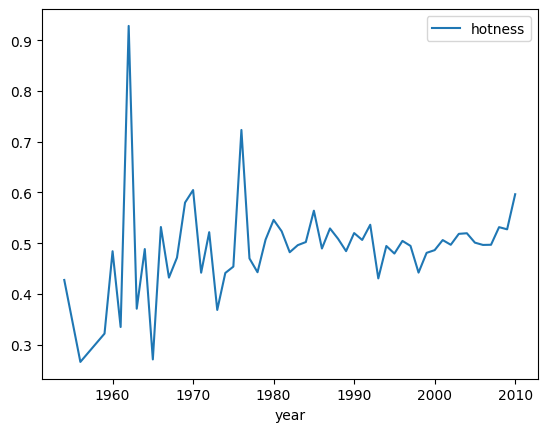

In [26]:
average_per_year = filtered_df.select_dtypes(include= np.number).groupby("year").mean()
average_per_year.plot(y="hotness")

In [28]:
top5_years=average_per_year.sort_values(by="hotness", ascending= False).head()
print(top5_years)

       hotness
year          
1962  0.928367
1976  0.723213
1970  0.604762
2010  0.596496
1969  0.580015
